In [1]:
import requests

client_id = '---'
client_secret = "---"

url = "https://openapi.naver.com/v1/vision/celebrity"
files = {'image': open('./data/face_detection_test_IU.jpg', 'rb')}
headers = {'X-Naver-Client-Id': client_id, 'X-Naver-Client-Secret': client_secret }
response = requests.post(url,  files=files, headers=headers)

In [2]:
import json

print(json.dumps(json.loads(response.text), indent=4, ensure_ascii=False))

{
    "info": {
        "size": {
            "width": 914,
            "height": 836
        },
        "faceCount": 1
    },
    "faces": [
        {
            "celebrity": {
                "value": "아이유",
                "confidence": 0.465941
            }
        }
    ]
}


In [4]:
url = "https://openapi.naver.com/v1/vision/celebrity"
files = {'image': open('./data/face_detection_test_AJ.jpg', 'rb')}
headers = {'X-Naver-Client-Id': client_id, 'X-Naver-Client-Secret': client_secret }
response = requests.post(url,  files=files, headers=headers)

print(json.dumps(json.loads(response.text), indent=4, ensure_ascii=False))

{
    "info": {
        "size": {
            "width": 500,
            "height": 504
        },
        "faceCount": 4
    },
    "faces": [
        {
            "celebrity": {
                "value": "이하린",
                "confidence": 0.376138
            }
        },
        {
            "celebrity": {
                "value": "이훈",
                "confidence": 0.186807
            }
        },
        {
            "celebrity": {
                "value": "김정국",
                "confidence": 0.403211
            }
        },
        {
            "celebrity": {
                "value": "백준기",
                "confidence": 0.124162
            }
        }
    ]
}


In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as patches
import numpy as np
%matplotlib inline

In [8]:
!pip install pillow

     |████████████████████████████████| 3.9MB 48kB/s eta 0:00:017


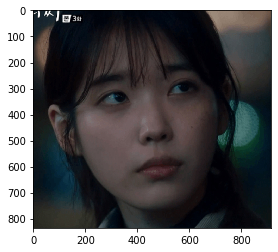

In [9]:
img = mpimg.imread('./data/face_detection_test_IU.jpg')
imgplot = plt.imshow(img)

In [10]:
url = "https://openapi.naver.com/v1/vision/face"
files = {'image': open('./data/face_detection_test_IU.jpg', 'rb')}
headers = {'X-Naver-Client-Id': client_id, 'X-Naver-Client-Secret': client_secret }
response = requests.post(url, files=files, headers=headers)

print(json.dumps(json.loads(response.text), indent=4, ensure_ascii=False))

{
    "info": {
        "size": {
            "width": 914,
            "height": 836
        },
        "faceCount": 1
    },
    "faces": [
        {
            "roi": {
                "x": 193,
                "y": 192,
                "width": 518,
                "height": 518
            },
            "landmark": {
                "leftEye": {
                    "x": 320,
                    "y": 323
                },
                "rightEye": {
                    "x": 574,
                    "y": 288
                },
                "nose": {
                    "x": 459,
                    "y": 453
                },
                "leftMouth": {
                    "x": 392,
                    "y": 620
                },
                "rightMouth": {
                    "x": 571,
                    "y": 595
                }
            },
            "gender": {
                "value": "female",
                "confidence": 0.996178
            },
         

In [11]:
detect_result = json.loads(response.text)
detect_summary = detect_result['faces'][0]
detect_summary.keys()

dict_keys(['roi', 'landmark', 'gender', 'age', 'emotion', 'pose'])

In [12]:
detect_summary['roi']

{'x': 193, 'y': 192, 'width': 518, 'height': 518}

In [13]:
detect_summary['gender']

{'value': 'female', 'confidence': 0.996178}

In [14]:
detect_summary['emotion']

{'value': 'neutral', 'confidence': 0.999103}

In [15]:
detect_summary['age']

{'value': '17~21', 'confidence': 0.469397}

In [16]:
x, y, w, h = detect_summary['roi'].values()
gender, gen_confidence = detect_summary['gender'].values()
emotion, emotion_confidence = detect_summary['emotion'].values()
age, age_confidence = detect_summary['age'].values()

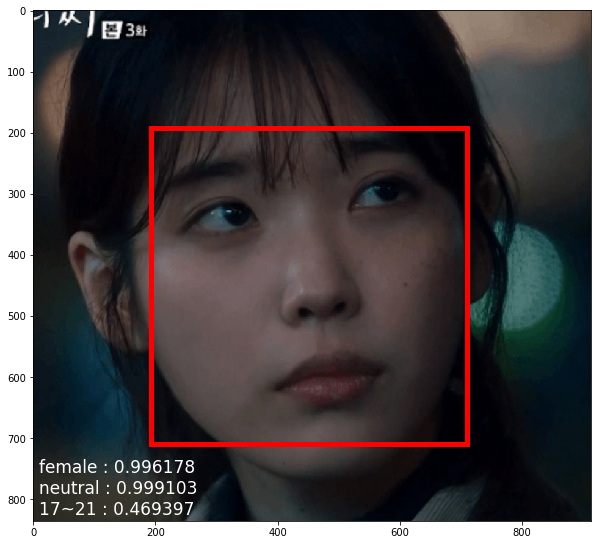

In [17]:
fig,ax = plt.subplots(figsize=(10,10))
ax.imshow(img)
rect_face = patches.Rectangle((x,y),w,h,
                              linewidth=5,
                              edgecolor='r',
                              facecolor='none')
ax.add_patch(rect_face)

annotation = gender + ' : ' + str(gen_confidence) + \
                '\n' + emotion + ' : ' + str(emotion_confidence) + \
                '\n' + age + ' : ' + str(age_confidence)
plt.text(10, 820 , annotation, wrap=True, fontsize=17, color='white')
plt.show()

In [18]:
url = "https://openapi.naver.com/v1/vision/face"
files = {'image': open('./data/face_detection_test_AJ.jpg', 'rb')}
headers = {'X-Naver-Client-Id': client_id, 'X-Naver-Client-Secret': client_secret }
response = requests.post(url, files=files, headers=headers)

print(json.dumps(json.loads(response.text), indent=4, ensure_ascii=False))

{
    "info": {
        "size": {
            "width": 500,
            "height": 504
        },
        "faceCount": 4
    },
    "faces": [
        {
            "roi": {
                "x": 335,
                "y": 195,
                "width": 138,
                "height": 138
            },
            "landmark": {
                "leftEye": {
                    "x": 366,
                    "y": 235
                },
                "rightEye": {
                    "x": 437,
                    "y": 225
                },
                "nose": {
                    "x": 402,
                    "y": 277
                },
                "leftMouth": {
                    "x": 382,
                    "y": 314
                },
                "rightMouth": {
                    "x": 437,
                    "y": 311
                }
            },
            "gender": {
                "value": "female",
                "confidence": 0.999764
            },
         

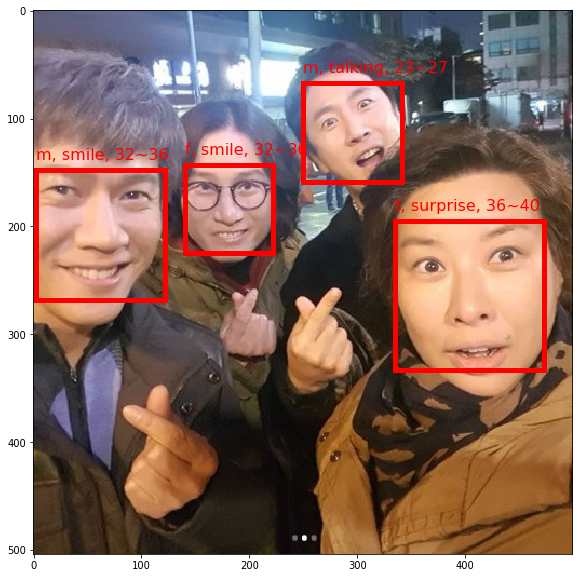

In [19]:
img = mpimg.imread('./data/face_detection_test_AJ.jpg')
detect_result = json.loads(response.text)

fig,ax = plt.subplots(figsize=(10,10))
ax.imshow(img)

for each in detect_result['faces']:
    x, y, w, h = each['roi'].values()
    gender, gen_confidence = each['gender'].values()
    emotion, emotion_confidence = each['emotion'].values()
    age, age_confidence = each['age'].values()
    
    rect_face = patches.Rectangle((x,y),w,h, linewidth=5, 
                                  edgecolor='r', facecolor='none')
    ant_letter = gender[0] + ', ' + emotion +', ' +  age
    plt.text(x,y-10, ant_letter, size=16, color='red')
    ax.add_patch(rect_face)

plt.show()

---

In [20]:
import requests

url = "https://kapi.kakao.com/v1/vision/face/detect"
MYAPP_KEY = '533c077d12a31b9fc08c5d6543ee5b90'
headers = {'Authorization': 'KakaoAK {}'.format(MYAPP_KEY)}

filename = './data/face_detection_test_IU.jpg'
files = { 'file' : open(filename, 'rb')}

response = requests.post(url, headers=headers, files=files)
print(json.dumps(json.loads(response.text), indent=4, ensure_ascii=False))

{
    "result": {
        "width": 914,
        "height": 836,
        "faces": [
            {
                "facial_attributes": {
                    "gender": {
                        "male": 0.0004242938302922994,
                        "female": 0.999575674533844
                    },
                    "age": 20.431013107299805
                },
                "facial_points": {
                    "jaw": [
                        [
                            0.15826635037905165,
                            0.453290689081094
                        ],
                        [
                            0.17562758198695308,
                            0.5461891254012703
                        ],
                        [
                            0.19982072115302604,
                            0.638138904151581
                        ],
                        [
                            0.23148770606568103,
                            0.7262842093256554
       

In [21]:
result = response.json()
faces = result['result']['faces'][0]
facial_points = faces['facial_points']
fig_w, fig_h = result['result']['width'], result['result']['height']

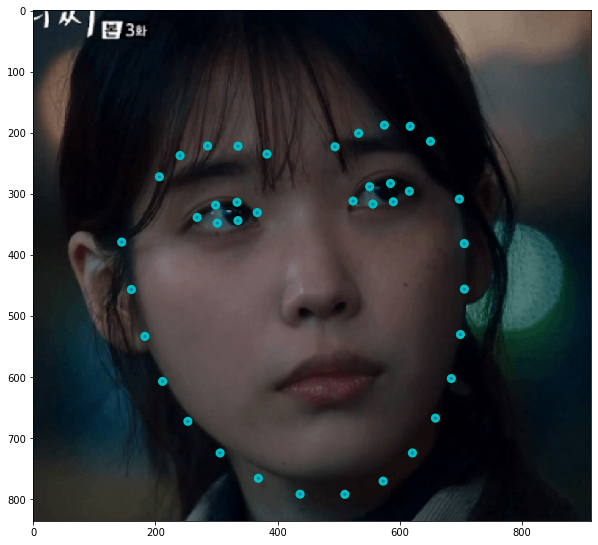

In [22]:
img = mpimg.imread('./data/face_detection_test_IU.jpg')
target_obj = ['right_eyebrow', 'left_eyebrow', 'jaw', 'right_eye', 'left_eye']

fig,ax = plt.subplots(figsize=(10,10))
for each_obj in target_obj:
    for each in facial_points[each_obj]:
        rect_face = patches.Circle((each[0]*fig_w, each[1]*fig_h),
                                   linewidth=3, edgecolor='c')
        ax.add_patch(rect_face)
    
ax.imshow(img)
plt.show()

In [24]:
url = "https://kapi.kakao.com/v1/vision/product/detect"
MYAPP_KEY = '533c077d12a31b9fc08c5d6543ee5b90'
headers = {'Authorization': 'KakaoAK {}'.format(MYAPP_KEY)}

filename = './data/face_detection_test_MR.jpg'
files = { 'file' : open(filename, 'rb')}

response = requests.post(url, headers=headers, files=files)
print(json.dumps(json.loads(response.text), indent=4, ensure_ascii=False))

{
    "result": {
        "width": 1182,
        "height": 605,
        "objects": [
            {
                "x1": 0.532149,
                "y1": 0.393388,
                "x2": 0.742809,
                "y2": 0.829752,
                "class": "t-shirts"
            },
            {
                "x1": 0.646362,
                "y1": 0.808264,
                "x2": 0.733503,
                "y2": 0.978512,
                "class": "shoes"
            },
            {
                "x1": 0.497462,
                "y1": 0.4,
                "x2": 0.765651,
                "y2": 0.819835,
                "class": "one-piece"
            }
        ]
    }
}


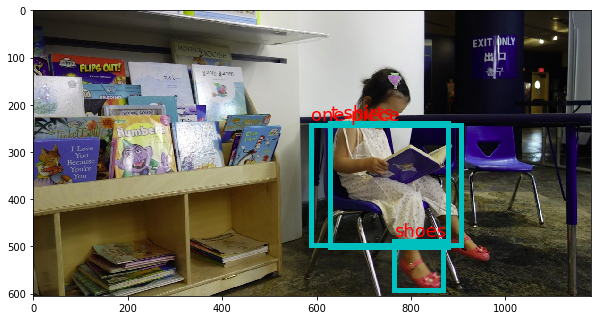

In [25]:
result = response.json()
fig_w, fig_h = result['result']['width'], result['result']['height']

img = mpimg.imread('./data/face_detection_test_MR.jpg')
fig,ax = plt.subplots(figsize=(10,10))

for each in result['result']['objects']:
    x, y = each['x1']*fig_w, each['y1']*fig_h
    w, h = each['x2']*fig_w - x, each['y2']*fig_h - y
    rect = patches.Rectangle((x, y), w, h, lw=5, edgecolor='c', facecolor='none')
    ax.add_patch(rect)
    plt.text(x,y-10, each['class'], size=18, color='red')
    
ax.imshow(img)
plt.show()

In [26]:
url = "https://kapi.kakao.com/v1/vision/product/detect"
MYAPP_KEY = '533c077d12a31b9fc08c5d6543ee5b90'
headers = {'Authorization': 'KakaoAK {}'.format(MYAPP_KEY)}

filename = './data/face_detection_test_MR2.jpg'
files = { 'file' : open(filename, 'rb')}

response = requests.post(url, headers=headers, files=files)
print(json.dumps(json.loads(response.text), indent=4, ensure_ascii=False))

{
    "result": {
        "width": 1157,
        "height": 722,
        "objects": [
            {
                "x1": 0.269663,
                "y1": 0.0,
                "x2": 0.662921,
                "y2": 0.729917,
                "class": "tote bag"
            }
        ]
    }
}


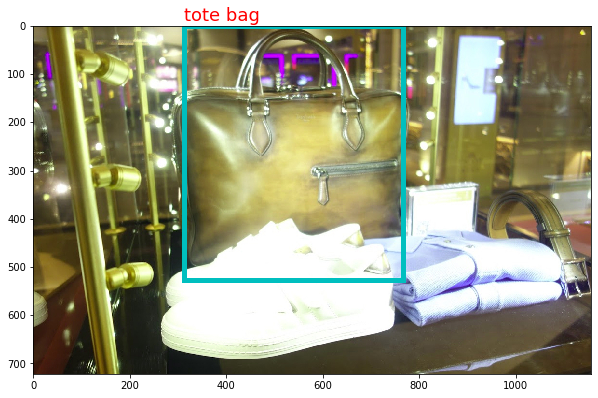

In [27]:
result = response.json()
fig_w, fig_h = result['result']['width'], result['result']['height']

img = mpimg.imread('./data/face_detection_test_MR2.jpg')
fig,ax = plt.subplots(figsize=(10,10))

for each in result['result']['objects']:
    x, y = each['x1']*fig_w, each['y1']*fig_h
    w, h = each['x2']*fig_w - x, each['y2']*fig_h - y
    rect = patches.Rectangle((x, y), w, h, lw=5, edgecolor='c', facecolor='none')
    ax.add_patch(rect)
    plt.text(x,y-10, each['class'], size=18, color='red')
    
ax.imshow(img)
plt.show()